<a href="https://colab.research.google.com/github/amrilhakimsihotang/Machine_Learning_TensorFlow/blob/Project_Image_Classification_Model_Deployment/Project_Image_Classification_Model_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Amril Hakim Sihotang<br>
Project : Image Classification Model Deployment

In [ ]:
from google.colab import files

files.upload();

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset
!kaggle datasets download -d nikitaparakh/dataset-3k

 99% 328M/330M [00:09<00:00, 40.1MB/s]
100% 330M/330M [00:09<00:00, 38.3MB/s]
 68% 7.00M/10.4M [00:00<00:00, 13.6MB/s]
100% 10.4M/10.4M [00:00<00:00, 12.9MB/s]


In [ ]:
!unzip -q /content/face-mask-12k-images-dataset.zip -d /content/files
!unzip -q /content/dataset-3k.zip -d /content/files

In [ ]:
import os
import shutil

def copy_subfolders(source_dirs, datasetimage):

    if not os.path.exists(datasetimage):
        os.makedirs(datasetimage)

    for source_dir in source_dirs:
        subfolders = [f for f in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, f))]

        for folder in subfolders:
            source_subfolder = os.path.join(source_dir, folder)
            destination_subfolder = os.path.join(datasetimage, folder)
            shutil.copytree(source_subfolder, destination_subfolder)

    print("Semua subfolder sudah tercopy ke datasetimage.")

source_directories = ['/content/files/Face Mask Dataset/Train', '/content/files/train_eye_3k/train']
datasetimage_directory = '/content/files/datasetimage'

copy_subfolders(source_directories, datasetimage_directory)



Semua subfolder sudah tercopy ke datasetimage.


In [ ]:
import os

def count_files_recursive(root_dir):
    total_files = 0

    for root, dirs, files in os.walk(root_dir):
        total_files += len(files)

    return total_files

root_directory = '/content/files/datasetimage'
total_files = count_files_recursive(root_directory)

print("Total files di datasetimage:", total_files)


Total files di datasetimage: 13000


In [ ]:
from PIL import Image
import os

def get_resolutions(folder_path):

    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    resolutions_dict = {}

    for file_name in files:
        file_path = os.path.join(folder_path, file_name)

        with Image.open(file_path) as img:
            width, height = img.size
            resolution = f"{width} x {height}"

            if resolution not in resolutions_dict:
                resolutions_dict[resolution] = [file_name]
            else:
                resolutions_dict[resolution].append(file_name)

    return resolutions_dict

main_folder_path = '/content/files/datasetimage'

subfolders = [f for f in os.listdir(main_folder_path) if os.path.isdir(os.path.join(main_folder_path, f))]

for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder_path, subfolder)

    resolutions_dict = get_resolutions(subfolder_path)

    print(f"Subfolder: {subfolder}")
    for resolution, files in resolutions_dict.items():
        if len(files) > 1:
            print(f"Resolusi image: {resolution}")
    print("\n")


Subfolder: open
Resolusi image: 71 x 71
Resolusi image: 85 x 85
Resolusi image: 100 x 100
Resolusi image: 80 x 80
Resolusi image: 68 x 68
Resolusi image: 69 x 69
Resolusi image: 74 x 74
Resolusi image: 67 x 67
Resolusi image: 78 x 78
Resolusi image: 79 x 79
Resolusi image: 64 x 64
Resolusi image: 83 x 83
Resolusi image: 102 x 102
Resolusi image: 73 x 73
Resolusi image: 84 x 84
Resolusi image: 86 x 86
Resolusi image: 89 x 89
Resolusi image: 98 x 98
Resolusi image: 62 x 62
Resolusi image: 76 x 76
Resolusi image: 81 x 81
Resolusi image: 65 x 65
Resolusi image: 88 x 88
Resolusi image: 117 x 117
Resolusi image: 75 x 75
Resolusi image: 91 x 91
Resolusi image: 87 x 87
Resolusi image: 66 x 66
Resolusi image: 111 x 111
Resolusi image: 70 x 70
Resolusi image: 63 x 63
Resolusi image: 77 x 77
Resolusi image: 72 x 72
Resolusi image: 103 x 103
Resolusi image: 61 x 61
Resolusi image: 137 x 137
Resolusi image: 135 x 135
Resolusi image: 96 x 96
Resolusi image: 59 x 59
Resolusi image: 143 x 143
Resolusi

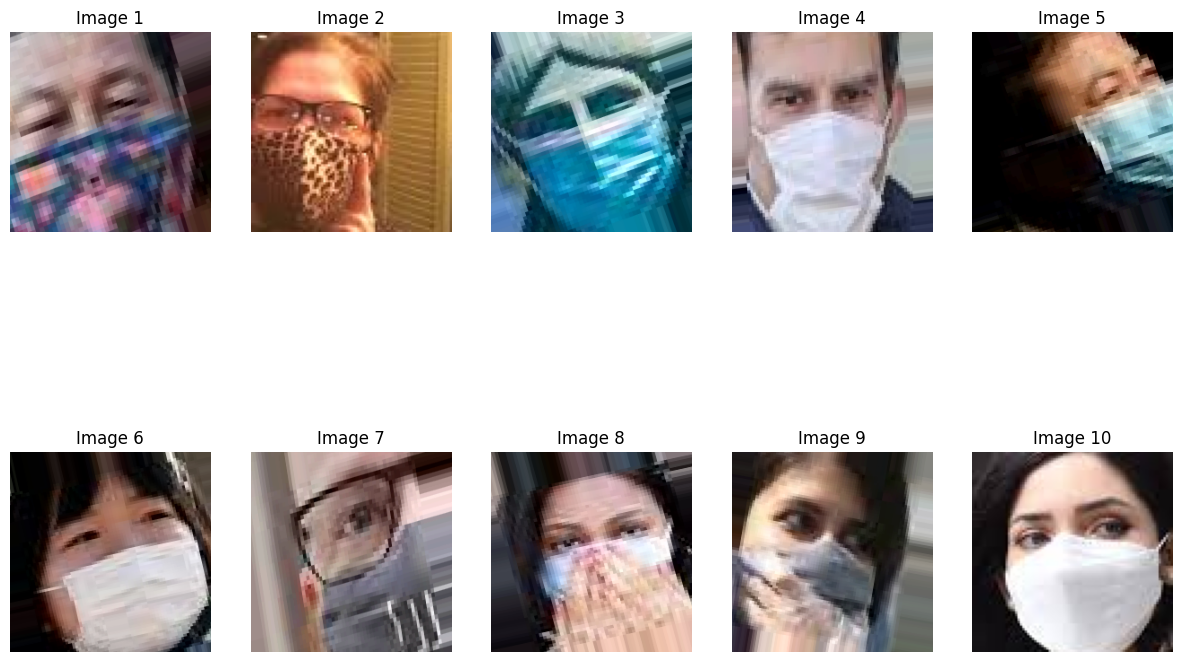

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

directory = '/content/files/datasetimage/WithMask'

image_files = os.listdir(directory)


random_images = random.sample(image_files, 10)

plt.figure(figsize=(15, 10))
for i, image_name in enumerate(random_images):
    img_path = os.path.join(directory, image_name)
    img = mpimg.imread(img_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title('Image {}'.format(i+1))
    plt.axis('off')

plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#split
base_dir = '/content/files/datasetimage'

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(rescale = 1./ 255)

train_generator = datagen.flow_from_directory(
    base_dir ,
    target_size=(125, 125),
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    base_dir ,
    target_size=(125, 125),
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 10400 images belonging to 4 classes.
Found 2600 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
      print("\nAkurasi pada train dan validation set telah mencapai > 92%!")
      self.model.stop_training = True
callbacks = myCallback()

img_height = 125
img_width = 125
num_epochs = 40
num_classes = 4
int_lr = 0.001


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    callbacks=[callbacks],verbose =2
)



Epoch 1/40
325/325 - 82s - loss: 0.4550 - accuracy: 0.7919 - val_loss: 0.2981 - val_accuracy: 0.8681 - 82s/epoch - 254ms/step
Epoch 2/40
325/325 - 72s - loss: 0.2660 - accuracy: 0.8872 - val_loss: 0.2730 - val_accuracy: 0.8773 - 72s/epoch - 221ms/step
Epoch 3/40
325/325 - 71s - loss: 0.2068 - accuracy: 0.9273 - val_loss: 0.2131 - val_accuracy: 0.9082 - 71s/epoch - 219ms/step
Epoch 4/40
325/325 - 63s - loss: 0.1757 - accuracy: 0.9403 - val_loss: 0.1919 - val_accuracy: 0.9144 - 63s/epoch - 193ms/step
Epoch 5/40
325/325 - 77s - loss: 0.1420 - accuracy: 0.9496 - val_loss: 0.1543 - val_accuracy: 0.9452 - 77s/epoch - 238ms/step
Epoch 6/40
325/325 - 63s - loss: 0.1208 - accuracy: 0.9544 - val_loss: 0.1321 - val_accuracy: 0.9371 - 63s/epoch - 194ms/step
Epoch 7/40
325/325 - 59s - loss: 0.1101 - accuracy: 0.9597 - val_loss: 0.1744 - val_accuracy: 0.9128 - 59s/epoch - 182ms/step
Epoch 8/40
325/325 - 67s - loss: 0.0999 - accuracy: 0.9609 - val_loss: 0.1818 - val_accuracy: 0.9109 - 67s/epoch - 207

In [ ]:
model.save('my_image_classifier.keras')
print(f"File {'my_image_classifier.keras'} berhasil disimpan")

File my_image_classifier.keras berhasil disimpan


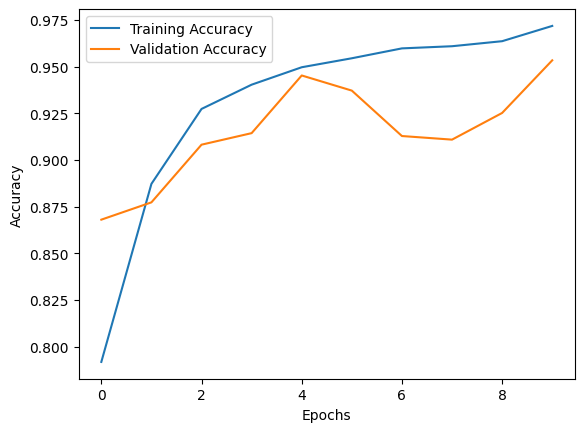

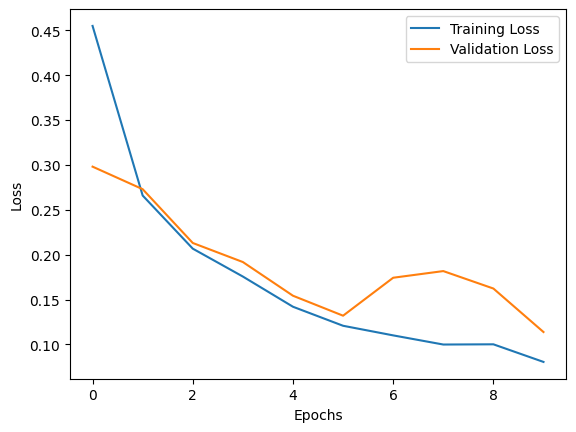

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model("/content/my_image_classifier.keras")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()


with open('my_image_classifier.tflite', 'wb') as f:
    f.write(tflite_model)
print("Konversi berhasil. Model TensorFlow Lite telah disimpan sebagai 'my_image_classifier.tflite'")

Konversi berhasil. Model TensorFlow Lite telah disimpan sebagai 'my_image_classifier.tflite'
